# Cross validation

This will demonstate on how to perform K-fold cross validation in a sample dataset.

## Importing and loading data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)

2.1.3
1.26.1


In [2]:
# Loading the data
data = pd.read_csv('datasets/data_cleaned.csv')

# Checking the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
# Checking for NULL values
data.isnull().sum().head()

Survived    0
Age         0
Fare        0
Pclass_1    0
Pclass_2    0
dtype: int64

## Splitting data

### Segregating variables - Dependent & Independent

In [4]:
# For training set
X = data.drop(['Survived'], axis=1)
y = data['Survived']

print(X.shape, y.shape)

(891, 24) (891,)


### Scaling the data

In [6]:
# Scale the data with the help of StandardScaler() function
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
X = ss.fit_transform(X)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 96, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 24) (668,)
(223, 24) (223,)


## Performing K-nearest neighbours algorithm

In [12]:
# importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

score = cross_val_score(KNN(n_neighbors = 3), X = X_train, y = y_train, cv = 10)
print('Scores:', score)

# Consistency using Mean and standard deviation in percentage
print(score.mean().round(2)*100, score.std().round(2)*100)

Scores: [0.76119403 0.74626866 0.76119403 0.7761194  0.65671642 0.80597015
 0.8358209  0.80597015 0.81818182 0.74242424]
77.0 5.0


### Automating the process of cross validation for different K-Neighbors

In [15]:
# a function val_score to calculate the mean and standard deviation at different number of neighbours
def val_score(n_neighbors):
    '''
      takes range of n_neighbors as input
      returns mean and standard Deviation for each value of n_neighbors
    '''
    
    avg = []
    std = []
  
    for i in n_neighbors:
    
        # 10 fold cross validation for every value of n_neighbor
        score = cross_val_score(KNN(n_neighbors = i), X = X_train, y = y_train, cv = 10)
        
        # adding mean to avg list
        avg.append(score.mean().round(2))
        
        # adding standard deviation to std list
        std.append(score.std().round(2))
    
    return avg, std

n_neighbors = range(1,50)
mean, std = val_score(n_neighbors)

print('Mean List:', mean)
print('\nStandard Deviation List:', std)

Mean List: [0.74, 0.75, 0.77, 0.78, 0.77, 0.77, 0.78, 0.78, 0.77, 0.78, 0.78, 0.79, 0.78, 0.79, 0.77, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78, 0.77, 0.77, 0.77, 0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.77, 0.77, 0.77, 0.76, 0.77, 0.76, 0.77, 0.76]

Standard Deviation List: [0.07, 0.05, 0.05, 0.06, 0.05, 0.05, 0.06, 0.05, 0.05, 0.05, 0.05, 0.03, 0.05, 0.04, 0.05, 0.05, 0.06, 0.04, 0.04, 0.03, 0.04, 0.03, 0.04, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.03, 0.02, 0.03, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.04, 0.03, 0.03]


### Plotting mean validation score for each K value

Text(0.5, 1.0, 'Mean Validation score')

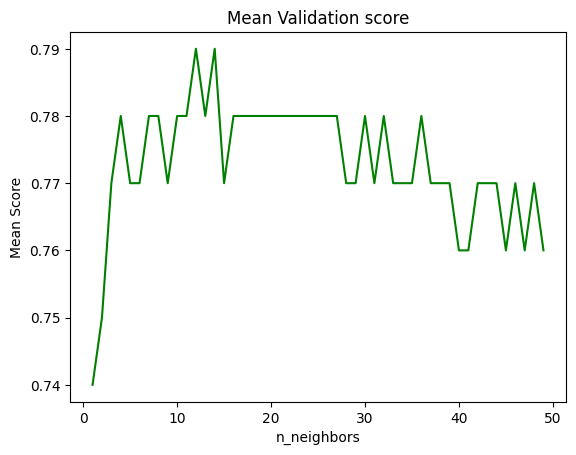

In [17]:
# Plotting the graphs
plt.plot(n_neighbors, mean, color = 'green', label = 'mean')

plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Plotting standard deviation validation score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

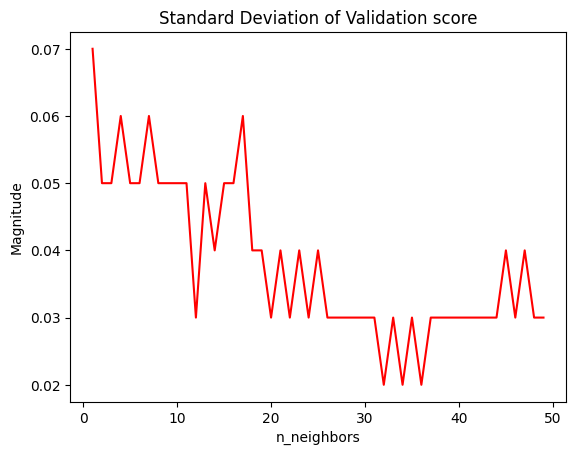

In [18]:
# Plotting the graph
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation')

plt.xlabel('n_neighbors')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Validation score')

In [21]:
# Performing KNN on the most optimal value
clf = KNN(n_neighbors = 14)
clf.fit(X_train, y_train)

score1 = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)

print(score1.round(3), score2.round(3))

0.811 0.816
